In [1]:
import sys; sys.path.append("../src")
from datasets import load_dataset
import numpy as np
from data import DataLoader
from layers import Linear, Module, Sequential, ReLU, Sigmoid
from activations import sigmoid, relu, softmax, tanh
from losses import CategoricalCrossEntropy
from optimizers import SGD, Adam
from data import DataLoader
from utils import Trainer
from metrics import categoricalAccuracy
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
mnist = load_dataset("ylecun/mnist")

In [3]:
def onehot(label):
    out = np.zeros((10,))
    out[label] = 1
    return out

train_data = DataLoader(
    inputs = [ np.array(mnist["train"][i]["image"]).flatten()/255.0 for i in range(500) ],
    labels = [ onehot(mnist["train"][i]["label"]) for i in range(500) ],
    batch_size = 32
)

val_data = DataLoader(
    inputs = [ np.array(mnist["train"][i]["image"]).flatten()/255.0 for i in range(2000, 2250) ],
    labels = [ onehot(mnist["train"][i]["label"]) for i in range(2000, 2250) ],
    batch_size = 1
)

In [4]:
class MNISTDenseClassifier(Module):
    def __init__(self):
        self.linear1 = Linear(784, 16, initializer="he")
        self.linear2 = Linear(16, 10, initializer="he")
    
    def __call__(self, x):
        x = self.linear1(x)
        x = relu(x)
        x = self.linear2(x)
        return softmax(x)

In [5]:
model = MNISTDenseClassifier()

print("Total parameters:", np.sum([len(p) for p in model.parameters()]))

Total parameters: 12730


In [6]:
history = Trainer(
    model = model,
    loss = CategoricalCrossEntropy(),
    optimizer = Adam(model.parameters(), 1e-3),
    train_data = train_data,
    val_data = val_data,
    metrics = [("accuracy", categoricalAccuracy)]
).train(10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 | train_loss: 2.2244 train_accuracy: 0.1833 || val_loss: 2.1124 val_accuracy: 0.2840
Epoch 1 | train_loss: 1.9317 train_accuracy: 0.4417 || val_loss: 1.8543 val_accuracy: 0.4880
Epoch 2 | train_loss: 1.6286 train_accuracy: 0.5833 || val_loss: 1.6161 val_accuracy: 0.5960
Epoch 3 | train_loss: 1.3952 train_accuracy: 0.6687 || val_loss: 1.4858 val_accuracy: 0.6080
Epoch 4 | train_loss: 1.1879 train_accuracy: 0.7208 || val_loss: 1.3151 val_accuracy: 0.6560
Epoch 5 | train_loss: 0.9951 train_accuracy: 0.7708 || val_loss: 1.1812 val_accuracy: 0.6760
Epoch 6 | train_loss: 0.8623 train_accuracy: 0.7875 || val_loss: 1.1277 val_accuracy: 0.6880
Epoch 7 | train_loss: 0.7350 train_accuracy: 0.8167 || val_loss: 1.0464 val_accuracy: 0.7120
Epoch 8 | train_loss: 0.6657 train_accuracy: 0.8313 || val_loss: 0.9966 val_accuracy: 0.7360
Epoch 9 | train_loss: 0.5934 train_accuracy: 0.8458 || val_loss: 0.9930 val_accuracy: 0.7400


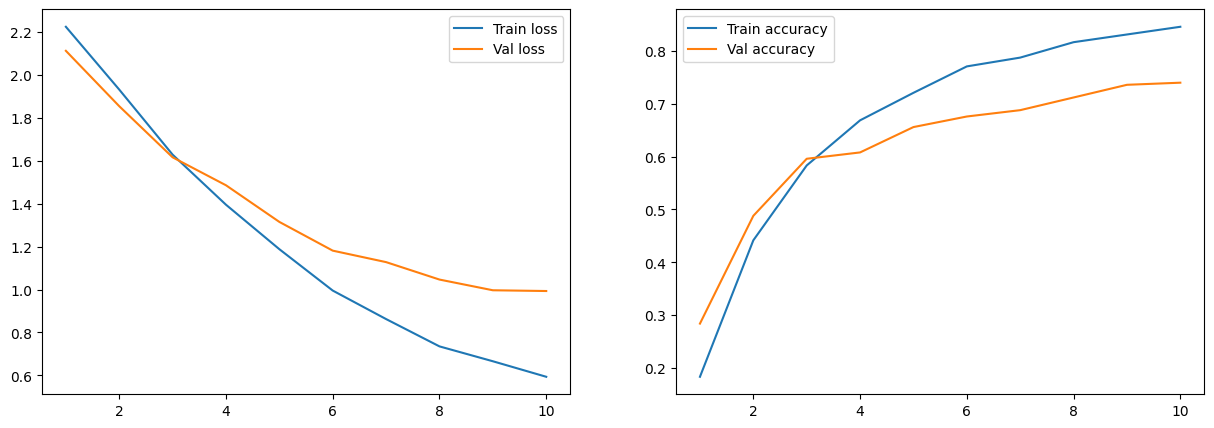

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot([h["epoch"] for h in history], [h["train_loss"] for h in history], label="Train loss")
plt.plot([h["epoch"] for h in history], [h["val_loss"] for h in history], label="Val loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot([h["epoch"] for h in history], [h["train_metrics"][0] for h in history], label="Train accuracy")
plt.plot([h["epoch"] for h in history], [h["val_metrics"][0] for h in history], label="Val accuracy")
plt.legend()
plt.show()